In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp2d, RectBivariateSpline

In [5]:
def plot_graph(x, y, c, i, name):
    plt.scatter(x, y, c=c)
    plt.colorbar()
    plt.title('data{}_chi-square value'.format(i))
    plt.xlabel('$\\theta_{23}$ (degree)')
    plt.ylabel('$\delta_{cp}$ (degree)')
    plt.clim(0,)
    plt.savefig('./graph/data '.format(i) + name)
    plt.show()

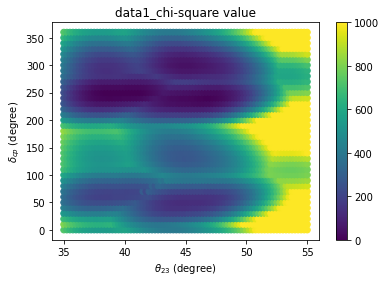

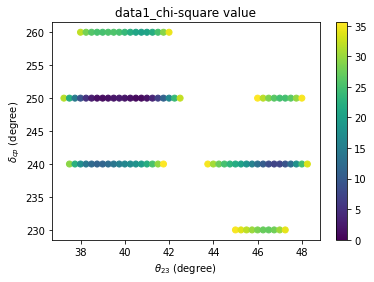

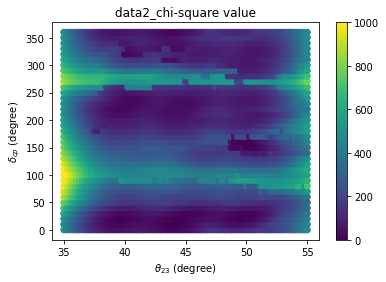

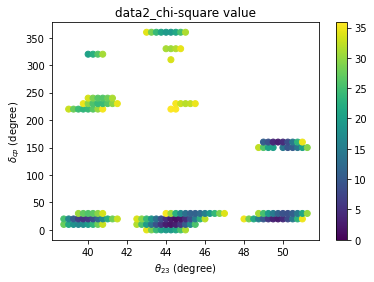

In [6]:
for i in range(1, 3):
    a = np.loadtxt('./chi_theta23_delta_contour/chi_theta23_delta_v{}.dat'.format(i))
    loc = np.where(a[:, 2] < 5.99**2)
    plot_graph(a[:, 0], a[:, 1], a[:,2], i, 'chi-square value_full')
    plot_graph(a[loc, 0], a[loc, 1], a[loc,2], i, 'chi-square value_two_sigma')

In [7]:
# for i in range(1, 3):
#     a = np.loadtxt('./chi_theta23_delta_contour/chi_theta23_delta_v{}.dat'.format(i))
#     arr = list(zip(*a))
#     f = interp2d(arr[0], arr[1], arr[2], kind='quintic', bounds_error=True)
#     xnew = np.linspace(35, 55, 1000)
#     ynew = np.linspace(0, 360, 1000)
#     znew = f(xnew, ynew)
#     mx, my = np.meshgrid(xnew, ynew)
#     x = np.reshape(mx, 1000000)
#     y = np.reshape(my, 1000000)
#     z = np.reshape(znew, 1000000)
#     plot_graph(x, y, z, i, 'chi-square value_full (interp2d-quintic)')
#     loc = np.where(z < 5.99**2)
#     plot_graph(x[loc], y[loc], z[loc], i, 'chi-square value_two_sigma (interp2d-quintic)')

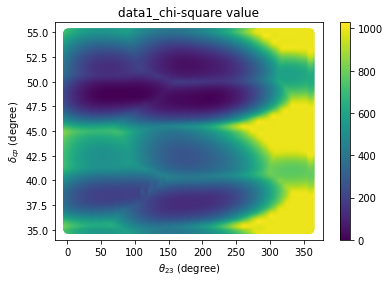

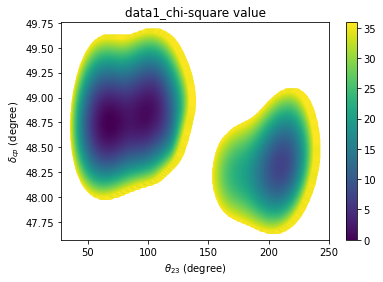

In [8]:
for i in range(1, 2):
    a = np.loadtxt('./chi_theta23_delta_contour/chi_theta23_delta_v{}.dat'.format(i))
    arr = list(zip(*a))
    x0 = sorted(set(arr[0]))
    y0 = sorted(set(arr[1]))
    z0 = np.reshape(arr[2], (81, 37))
    f = RectBivariateSpline(x0, y0, z0)
    xnew = np.linspace(35, 55, 1000)
    ynew = np.linspace(0, 360, 1000)
    znew = f(xnew, ynew)
    mx, my = np.meshgrid(xnew, ynew)
    x = np.reshape(mx, 1000000)
    y = np.reshape(my, 1000000)
    z = np.reshape(znew, 1000000)
    plot_graph(y, x, z, i , 'chi-square value_full (RectBivariateSpline)')
    loc = np.where(z < 5.99**2)
    plot_graph(y[loc], x[loc], z[loc], i, 'chi-square value_two_sigma (RectBivariateSpline)')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: No contour levels were found within the data range.
  if sys.path[0] == '':


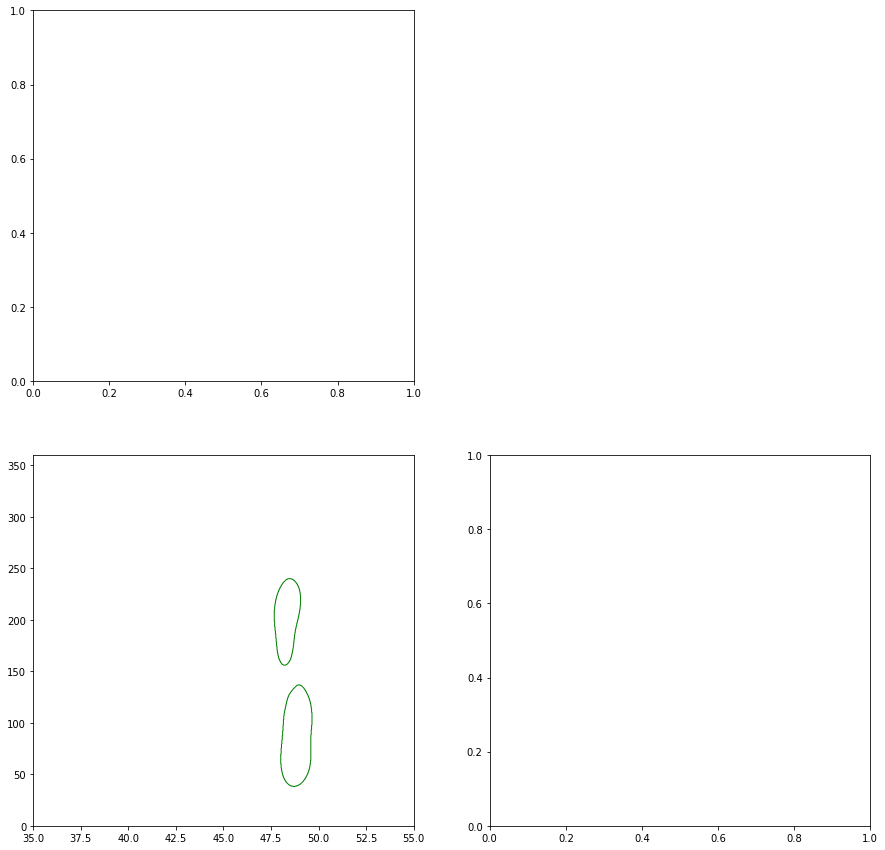

In [14]:
one_sigma_region_boundary = np.where(znew > 5.99**2, 1, 0 )

fig, ax = plt.subplots(1,1, figsize=(15,15))
plot_axis = plt.subplot(2,2,1)
# plot_axis.hist(pre_create_theta23,density=1,bins=100)

plot_axis = plt.subplot(2,2,4)

# plot_axis.hist(pre_create_delta,orientation="horizontal",density=1, bins=100)

plot_axis = plt.subplot(2,2,3)
CS_1_sigma = plt.contour(xnew, ynew, one_sigma_region_boundary, 0, colors='green', linestyles="-", linewidths=1)
# CS_2_sigma = plt.contour(xaxis, yaxis, two_sigma_region_boundary, 0, colors='red', linestyles="-", linewidths=1)
# CS_1_sigma.collections[0].set_label("1$\sigma$")
# CS_2_sigma.collections[0].set_label("2$\sigma$")
# plot_axis.scatter(xedges[max_poi[1]],yedges[max_poi[0]], c="r", s=5, label = "maximum point: $\\theta_{23}$=%.2f $\delta_{cp}$=%.2f" %(xedges[max_poi[1]][0], yedges[max_poi[0]][0]))
# plot_axis.scatter(data['theta23'][0], data['delta'][0], c="k", s=5, label = "true point: $\\theta_{23}$=%.2f $\delta_{cp}$=%.2f" %(data['theta23'][0], data['delta'][0]))

# # DUT2 = plot_axis.contour(X0, Y0, Z0, 0, colors='blue', linestyles="-", linewidths=1)
# # DUT2.collections[0].set_label("DUNE")
# plot_axis.set_xlabel(r'$\theta_{23} $', fontsize=20)
# plot_axis.set_ylabel(r'$\delta_{cp} $', fontsize=20)
# # plt.subplots_adjust(wspace=0.15, hspace=0.01)
# plt.legend(bbox_to_anchor=(2.3, 1.7), ncol=1,fontsize=20, markerscale=4, edgecolor = "w",fancybox=False, framealpha=0)
# plt.show()